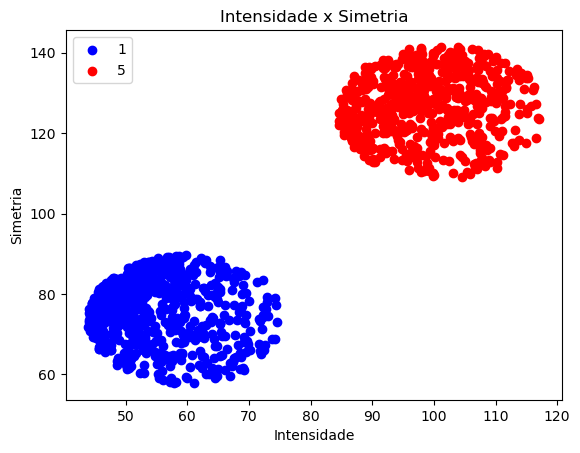

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv("train_reduzido_filter_1_5.csv", sep=";")

# Separando os dados por classe
dados_label_1 = dados[dados['label'] == 1]
dados_label_5 = dados[dados['label'] == 5]

# Plotando os pontos para cada classe com cores diferentes e legendas
plt.scatter(dados_label_1["intensidade"], dados_label_1["simetria"], c='blue', label='1')
plt.scatter(dados_label_5["intensidade"], dados_label_5["simetria"], c='red', label='5')

plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()


In [2]:
from sklearn.model_selection import train_test_split

# Separando os dados em treino e teste
X = dados[["intensidade", "simetria"]]
X["bias"] = 1
X = X[["bias", "intensidade", "simetria"]].values
y = dados["label"]
# substitui os valores de y por 1 ou -1
y = y.replace(1, -1)
y = y.replace(5, 1)
y = y.values   

In [3]:
from PLA import PlaPocket

pla = PlaPocket()
pla.execute(X, y)

print(pla.w)

35172
[-2.31170000e+04  3.06462745e+02 -1.32549020e+01]


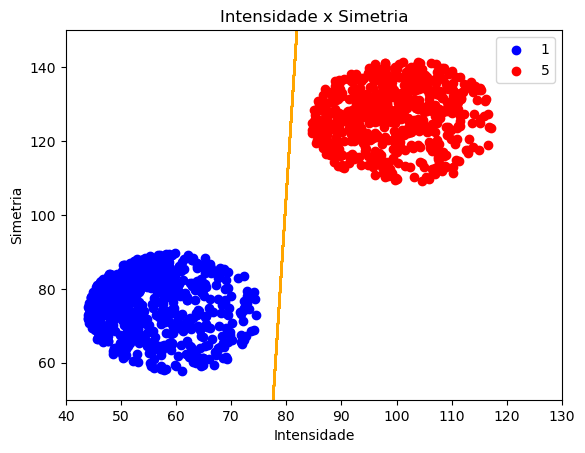

In [4]:
# plota o w com os dados
plt.scatter(dados_label_1["intensidade"], dados_label_1["simetria"], c='blue', label='1')
plt.scatter(dados_label_5["intensidade"], dados_label_5["simetria"], c='red', label='5')
plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.plot(X, (-pla.w[0] - pla.w[1]*X) / pla.w[2], c='orange')
# define os limites do gráfico
plt.xlim(40, 130)
plt.ylim(50, 150)
plt.show()